In [1]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files_path = "../experiment_hyper_tune/arz_learning_z/raissi_physics_flow/"
files = glob.glob(files_path+"*/")
print(len(files))

10


In [4]:
print(files[0])

../experiment_hyper_tune/arz_learning_z/flow/alpha=1-alpha_u_rho=0.7-loop_number=10/


In [12]:
results = {}
for i in range(len(files)):
    file = files[i].split("/")[-2]
    alpha =  file.split('=')[1].split('-')[0]
    alpha_u_rho = file.split('=')[2].split('-')[0]
    loop_number = file.split('=')[3]
    with open(files[i]+'/test_result/'+file+'/metrics_test.json') as json_file:
        metrics = json.load(json_file)
        if loop_number not in results.keys():
            results[loop_number] = {}
        if alpha not in results[loop_number].keys():
            results[loop_number][alpha] = {}
        results[loop_number][alpha].update({alpha_u_rho:metrics})

alpha=1-alpha_u_rho=0.7-loop_number=10
alpha=1-alpha_u_rho=0.3-loop_number=10
alpha=1-alpha_u_rho=0.7-loop_number=14
alpha=1-alpha_u_rho=0.3-loop_number=14
alpha=1-alpha_u_rho=0.5-loop_number=14
alpha=1-alpha_u_rho=0.1-loop_number=14
alpha=1-alpha_u_rho=0.1-loop_number=10
alpha=1-alpha_u_rho=0.9-loop_number=10
alpha=1-alpha_u_rho=0.5-loop_number=10
alpha=1-alpha_u_rho=0.9-loop_number=14


Text(0, 0.5, 'optimal_rmse')

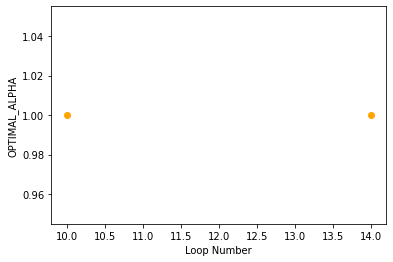

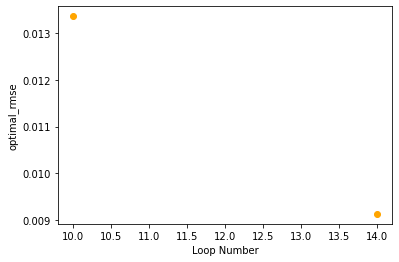

In [14]:
metric = 'rmse'
alpha_test = '1.0'
optimal_n_list = []
optimal_alpha_list = []
optimal_metric_list = [[],[]]
for n in results.keys():
    alpha_list = []
    mse_list = []
    std_list = []
    optimal_n_list.append(float(n))
    for a in results[n].keys():
        for a2 in results[n][a].keys():
            alpha_list.append(float(a))
            mse_mean = np.array(results[n][a][a2][metric]).mean()
            mse_list.append(mse_mean)
            std_list.append(np.array(results[n][a][a2][metric]).std())

#     mse_mean = np.array(results[n][alpha_test][metric]).mean()
#     optimal_metric_list[0].append(mse_mean)
#     optimal_metric_list[1].append(np.array(results[n][alpha_test][metric]).std())

#     plt.figure()
#     plt.scatter(alpha_list,mse_list)
#     plt.xlabel('alpha')
#     plt.ylabel(metric)
#     plt.title('number of train {}'.format(n))

    op_metric = np.array(mse_list).min()
    optimal_alpha_list.append(alpha_list[mse_list.index(op_metric)])
    optimal_metric_list[0].append(op_metric)
    optimal_metric_list[1].append(std_list[mse_list.index(op_metric)])

plt.figure()
plt.scatter(optimal_n_list,optimal_alpha_list,color = 'orange')
plt.xlabel('Loop Number')
plt.ylabel('OPTIMAL_ALPHA')


plt.figure()
optimal_n_list, optimal_metric_list[0], optimal_metric_list[1] =zip(*sorted(zip(optimal_n_list, optimal_metric_list[0], optimal_metric_list[1])))
plt.scatter(optimal_n_list,optimal_metric_list[0],color = 'orange')
plt.xlabel('Loop Number')
plt.ylabel('optimal_{}'.format(metric))

In [119]:
optimal_metric_list

[(0.6462954163551331,
  0.5640731155872345,
  0.5424306333065033,
  0.5602801144123077,
  0.5490609109401703,
  0.5417153298854828,
  0.5449501216411591),
 (0.0007907491131527679,
  0.000567712530743497,
  0.0004916488309191775,
  0.0010398074097819846,
  0.0005490949728232042,
  0.0008626343902255962,
  0.0004269798350087724)]

In [120]:
import pickle
with open('./{}/bsc_gan_alpha=1.0.pickle'.format(metric),'wb') as f:
    pickle.dump(optimal_metric_list,f)

In [136]:
b = "a"
a = f"{b}"

In [137]:
a

'a'